In [5]:
####################################################################
# Task 2 - Quantitative Methodology
#
# Data Analysis for Assignment 2 - QM 
# by I Gusti Ngurah Agung Krishna Aditya
# Management & Science University
#
# Dataset:
# https://www.data-in-brief.com/article/S2352-3409(18)31519-1/fulltext
#
####################################################################

In [6]:
# Import libraries
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data/booking_demand.csv")

In [7]:
# Calculate correlation
pearson_corr, p_value = pearsonr(data['lead_time'], data['previous_cancellations'])
print("Pearson Correlation (r):", pearson_corr)
print("p-value:", p_value)

Pearson Correlation (r): 0.08604180192787467
p-value: 6.140831672819821e-195


In [ ]:
# Regression analysis
X = data['lead_time']
Y = data['previous_cancellations']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(Y, X).fit()

# Output the regression results
print("R-squared:", model.rsquared)
print("Regression Coefficients:", model.params)
print(model.summary())

R-squared: 0.007403191678983512
Regression Coefficients: const        0.016408
lead_time    0.000680
dtype: float64
                              OLS Regression Results                              
Dep. Variable:     previous_cancellations   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     890.4
Date:                    Sun, 03 Nov 2024   Prob (F-statistic):          6.14e-195
Time:                            00:34:38   Log-Likelihood:            -1.4876e+05
No. Observations:                  119390   AIC:                         2.975e+05
Df Residuals:                      119388   BIC:                         2.975e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|

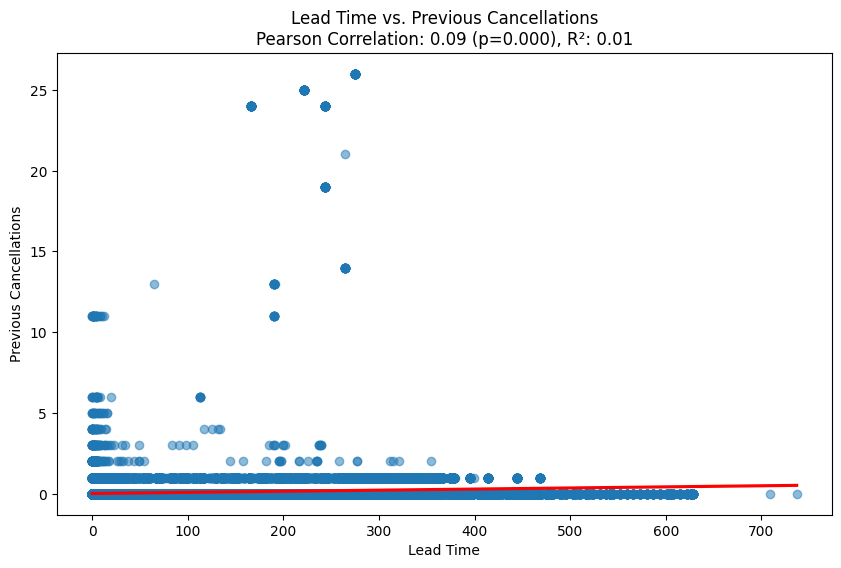

In [9]:
# Visualization of the data and regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='lead_time', y='previous_cancellations', data=data, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title(f"Lead Time vs. Previous Cancellations\nPearson Correlation: {pearson_corr:.2f} (p={p_value:.3f}), R²: {model.rsquared:.2f}")
plt.xlabel("Lead Time")
plt.ylabel("Previous Cancellations")
plt.show()